<a href="https://colab.research.google.com/github/Nguyen-Newcastle/housing_regression/blob/main/House_Price_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hello everyone and welcome to my notebook about Housing Price Prediction. Housing Price Prediction is one of the typical Regression problem that every Machine Learning or Deep Learning practitioners must have encountered at least once in their life, especially those who are begineers in this field. Machine Learning and Deep Learning algorithms are generally considered the best techniques that you can utilized to get accurate House Price predictions. In this notebook I will download a Kaggle dataset that contains informations about House Price in a region in the United States. The dataset is fairly small if compared to real-life dataset(training set just has 1000 samples), but that must be enough for amateurs like us.**

**First I install the library keras_tuner into our working environment. This is a library used in the hyperparameter tuning process of Deep Learning models, to help developers to find the combinations of hyperparameters that yield the best result. But first I will apply regular Machine Learning algorithm first, so let leave it here for use later.**

In [1]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 2.3 MB/s eta 0:00:00


**Belows is the preparatory code to check various configuration in the virtual environment. We check the version of tensorflow, scikit-learn and keras libraries and creating directory for storing images(if there is any). Finally we create a function to save the figures. Actually this is the piece of code I borrow from Aurelien Geron in his monumental introductory book for Machine Learning practitioners "Hand-on Machine Learning".**

In [2]:
import sys

assert sys.version_info >= (3, 7)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow import keras

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. RNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os
#Importing libraries needed
# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = os.getcwd()
CHAPTER_ID = "house_price_advanced_regression"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
#Function to save the figures, if any

In [3]:
#Import Zipfile to extract the zip file that contain the dataset.
import zipfile
import pandas as pd
import numpy as np

**I store my dataset, which is now condensed in a Zip file, in a GitHub repository. Here I pull the repository to the current working environment using the familiar command git clone.**

In [4]:
!git clone https://github.com/Nguyen-Newcastle/housing_regression.git

Cloning into 'housing_regression'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 200.28 KiB | 50.07 MiB/s, done.


In [5]:
#The folder that contain the Zip file.
DATASET_ROOT_DIR = os.path.join(PROJECT_ROOT_DIR, "housing_regression")

**Below we have a view at which files are stored in the Zip file. There are a txt file for data description, a sample csv file for submission of test data prediction, and most importantly, a csv file containing train data and the other for test data.**

In [6]:
#Constructing the path to the zipfile containing the dataset. In here we list all the files inside the zip archive.
HOUSING_ZIPFILE_PATH = zipfile.ZipFile(os.path.join(DATASET_ROOT_DIR,'house-prices-advanced-regression-techniques.zip'))
HOUSING_ZIPFILE_PATH.namelist()

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

In [7]:
HOUSING_ZIPFILE_PATH = os.path.join(DATASET_ROOT_DIR,'house-prices-advanced-regression-techniques.zip')

In [8]:
#Creating a location to extract the zipfile.
HOUSING_DATASET_DIRECTORY = os.path.join(DATASET_ROOT_DIR, 'dataset')
os.makedirs(HOUSING_DATASET_DIRECTORY, exist_ok = True)

**Function to extract Zip file to specified location.**

In [9]:
def extracting_zip_file(zipfile_directory = HOUSING_ZIPFILE_PATH, where_to_extract = HOUSING_DATASET_DIRECTORY):
    with zipfile.ZipFile(HOUSING_ZIPFILE_PATH, "r") as path:
          path.extractall(where_to_extract)
          path.close()
#A function to extract all files inside a zip file. This function is used to extract everything from the zipfile to a specified location(in this case,
#the directory "DATASET_ROOT_DIR")

**Extracting Zip file**

In [10]:
extracting_zip_file() #EXTRACTION

**Function for reading housing data from csv file into a pandas DataFrame.**

In [11]:
def reading_housing_data(directory = os.path.join(HOUSING_DATASET_DIRECTORY,"train.csv")):
    return pd.read_csv(directory)
#Function to return a DataFrame about housing data.

**Now what we are going to do is reading the training dataset and try to get the general information about the data we have, in order to prepare for subsequent training using Machine Learning. First I am going to use scikit-learn to train Machine Learning model, without using neural networks.**

In [12]:
train_dataframe = reading_housing_data()
train_dataframe

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


**Below we use the function info() to get some basic information about our training set. There are 1460 samples in the train set. You can see that there are numerical columns with missing values, but none of these numerical columns has so many missing values, so I won't drop any of the numerical columns. For categorical columns, there are many of them which contain mostly NaN values, but I still decide to keep all of them in the preprocessing step.**

In [93]:
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Distribution of the target column "SalePrice" in the training set. You can clearly see that the housing prices mainly concentrate around the range 100000-to-200000.**

Saving figure SalePrice_distribution


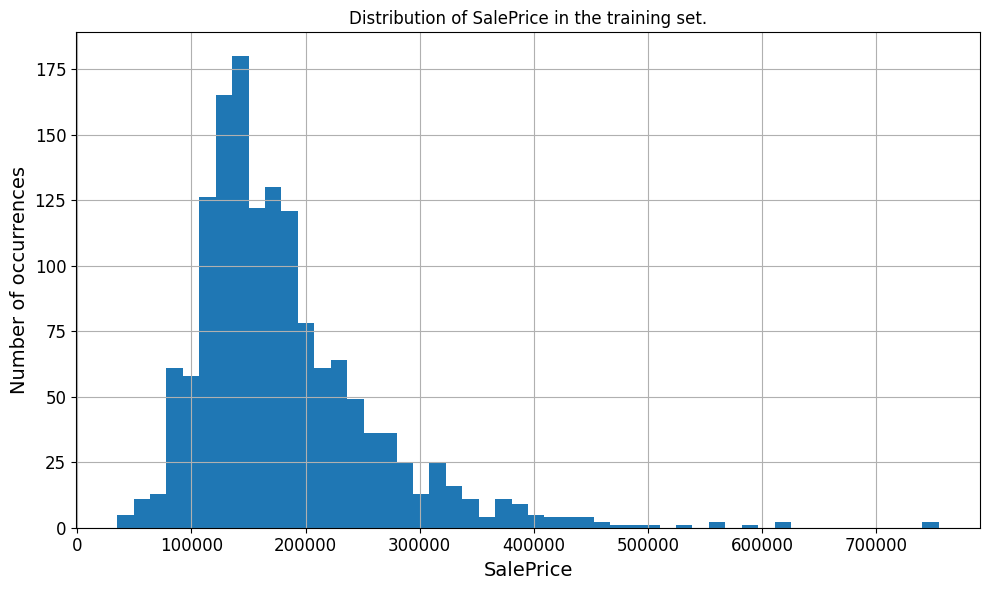

In [13]:
plt.figure(figsize = (10,6))
train_dataframe['SalePrice'].hist(bins = 50)
plt.title("Distribution of SalePrice in the training set.")
plt.xlabel("SalePrice", fontsize = 14)
plt.ylabel("Number of occurrences", fontsize = 14)
save_fig("SalePrice_distribution")
plt.show()

**For each categorical columns, I calculate the number of unique categories within each column. In here you can see that we got so many categorical columns in the dataset, but the number of categories in each column is not so much. Most of them have only around less than 10 unique categories. So the conclusion is that, later in the preprocessing step we can perform one-hot-encoding on categorical columns.**

In [15]:
category_column_names = list(train_dataframe.select_dtypes(include = ['object']).columns)
num_unique_values = []
for column_names in category_column_names:
    num_unique = len(pd.unique(train_dataframe[column_names]))
    num_unique_values.append(num_unique)
pd.DataFrame({"Unique_Values": num_unique_values}, index = category_column_names)

,Unique_Values
MSZoning,5
Street,2
Alley,3
LotShape,4
LandContour,4
Utilities,2
LotConfig,5
LandSlope,3
Neighborhood,25
Condition1,9


**You can see here we got 38 numerical columns(including the target column "SalePrice"). Obviously we don't need the column name "Id" in our final training dataset, so we will drop it in the preprocessing step.**

In [16]:
train_dataframe.select_dtypes(include = ['int64', 'float64'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


**Later on we must preprocess the original dataframe in order to get the dataset ready to be fed into Machine Learning algorithm, so I build this class to drop columns I don't want to be included. So I build this class, which inherit scikit-learn Base Class for all estimators in scikit-learn. The transform() function would take a list of column names I want to drop and then would drop columns with those names. Later I will pass this class into scikit-learn preprocessing pipeline.**

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
class Drop_Column(BaseEstimator, TransformerMixin):
      def __init__(self, drop_column = ["Id"]):
          self.drop_column = drop_column
      def fit(self, X, y = None):
          return self
      def transform(self, X):
          data = X.copy()
          if self.drop_column is not None:
              data = data.drop(labels = self.drop_column,axis = 1)
          return data

In [18]:
train_labels = train_dataframe["SalePrice"].copy()
train_dataframe.drop("SalePrice", axis = 1, inplace = True)

**In this stage we will build the pipeline to preprocess the train dataframe, making it ready to be fed into Machine Learning model. Scikit Learn offer many really useful, easy-to-use functions for us to do. Our data would go through two separate pipelines, one piepline is reserved for numerical columns and the other pipeline is for categorical data.**

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [20]:
from sklearn.compose import make_column_selector

**For numerical columns, we would fill columns which have null values with the median value of that particular column. We do that because all numerical columns have fairly adequate data and the amount of missing data is fairly small. If there are columns which contain mostly null values, we probably have to drop it, but that's not the case at least for this dataset.**

In [21]:
num_pipeline = Pipeline([("imputer",SimpleImputer(strategy = "median")),
                        ("std_scaler",StandardScaler())])
#Pipeline to transform numerical column. First we fill missing values with the median value of the respective column,
#then we standardize the data so that all columns will have the same scale.

**For categorical columns, we will do One-Hot Encoder, by that each column will be separated into multiple columns equal to the number of unique values in that column. By this technique, we would add hundred more features to our dataset, simply because the number of categorical columns and the number of categories for each categorical column is relatively large. In particular, we have the resulting dataset of about more than 200 features after going through full pipeline.**

In [22]:
cat_pipeline = Pipeline([("ordinal_encoder",
                          OneHotEncoder(handle_unknown = "infrequent_if_exist", min_frequency = 10))])
#For categorical columns, we use OneHotEncoder to transform the data.

**ColumnTransformer() function will separate the data into 2 different subset(numerical and categorical subset) and then apply different preprocessing pipelines for each of them. After getting the transformed subsets of both numerical and categorical ones, the 2 subsets will be concatenated into 1, ready for ML algorithm.**

In [23]:
col_transform = ColumnTransformer(transformers = [
    ("num_pipeline", num_pipeline,make_column_selector(dtype_include = np.number)),
    ("cat_pipeline", cat_pipeline,make_column_selector(dtype_include = object))
],sparse_threshold = 0.0)
#ColumnTransformer.

**Constructing the full pipeline and the dataframe would go through it.**

In [24]:
full_pipeline = Pipeline([("drop_process", Drop_Column()),
                         ("col_transform", col_transform)])
housing_prepared = full_pipeline.fit_transform(train_dataframe)
#The training data will undergo multiple transformation pipelines and finally we are ready for some ML algorithms.

**Here you clearly see that the number of features has increased dramatically from 79 to 260.**

In [25]:
housing_prepared.shape

(1460, 260)

**The mean and median housing prices of the training dataset, just to give a look at the error we should be able to achieve.**

In [26]:
train_labels.mean(), train_labels.median()

(180921.19589041095, 163000.0)

**Now it's time to train the dataset. We will try many ensemble of decision trees models to see which ones are the most appropriate for our tasks. In this stage the aim is just finding models which offer the most potential, so we wouldn't fine-tune the model by hyperparameters tuning, but instead we just use the default hyperparameters set by Scikit-Learn.**

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

**First we will experiment with RandomForestRegressor. First we fit the model with training data and training labels, we get the evaluation measured by Root-Mean Squared Error and then we would cross-validate the model to see how well it performs on average when facing with unseen validation data.**

In [28]:
random_forest_regressor = RandomForestRegressor(random_state = 42)
random_forest_regressor.fit(housing_prepared, train_labels)
mean_squared_error(train_labels, random_forest_regressor.predict(housing_prepared), squared = False)

11019.250068620648

In [29]:
from sklearn.metrics import make_scorer
mean_squared = make_scorer(mean_squared_error, greater_is_better = False)

In [30]:
from sklearn.model_selection import cross_val_score

**K-fold cross-validation, where we will divide the training data into 5 folds for cross validation and calculate the average results. Above we see that the training error is around 11000 but the cross-validation error is nearly 30000, so there must be overfitting occured.**

In [31]:
cross_validation = np.abs(cross_val_score(random_forest_regressor, housing_prepared, train_labels, cv = 5,scoring = mean_squared))
np.mean(np.sqrt(cross_validation))

29861.403387419374

**Repeating the process for BaggingRegressor**

In [32]:
from sklearn.ensemble import BaggingRegressor
bag_reg = BaggingRegressor(random_state = 42)
bag_reg.fit(housing_prepared, train_labels)
mean_squared_error(train_labels, bag_reg.predict(housing_prepared), squared = False)

11988.428927347184

In [33]:
cross_validation = np.abs(cross_val_score(bag_reg, housing_prepared, train_labels, cv = 5,scoring = mean_squared))
np.mean(np.sqrt(cross_validation))

30793.29629964789

**GradientBoostingRegressor**

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
grad_boost = GradientBoostingRegressor(random_state = 42)
grad_boost.fit(housing_prepared, train_labels)
mean_squared_error(train_labels, grad_boost.predict(housing_prepared), squared = False)
#Fitting the data with GradientBoostingRegressor model.

14497.804987707143

**The training error got bigger than the previous 2 models, but the cross-validation score becomes much better. Most promising model so far.**

In [35]:
cross_validation = np.abs(cross_val_score(grad_boost, housing_prepared, train_labels, cv = 5,scoring = mean_squared))
np.mean(np.sqrt(cross_validation))

26422.28767283751

**Experimenting with SVR, dissapointing result.**

In [36]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
linear_svr = SVR(kernel = "poly", degree = 20)
linear_svr.fit(housing_prepared, train_labels)
mean_squared_error(train_labels, linear_svr.predict(housing_prepared), squared = False)

70748.70236768886

**ExtraTreeRegressor, not so good either.**

In [37]:
from sklearn.ensemble import ExtraTreesRegressor
extra_tree = ExtraTreesRegressor(random_state = 42, n_estimators = 175, max_samples = 0.75, bootstrap = True)
extra_tree.fit(housing_prepared, train_labels)
mean_squared_error(train_labels, extra_tree.predict(housing_prepared), squared = False)
#Fitting the data with GradientBoostingRegressor model.

14354.799595106932

In [38]:
cross_validation = np.abs(cross_val_score(extra_tree, housing_prepared, train_labels, cv = 5,scoring = mean_squared))
np.mean(np.sqrt(cross_validation))

30035.537049913255

**In the code below I try using a relativelt new Tree Ensemble Model to fit my training dataset that require me to build relatively different preprocessing pipeline to prepare the appropriate form of data required by the model. To prepare data for the model named Histogram-Based Gradient Boosting Regressor, categorical columns must be passed through OrdinalEncoding, so unlike OneHotEncoder, the number of features after preprocessing remained unchanged. When unseen categories being passed to the pipeline during inference time(that's when you feed new data for a deployed Machine Learning model to make prediction), the OrdinalEncoder here would return NaN, but luckily this algorithm has way to deal with missing value in features, which I won't go into detail here. Anyway, this Model requires me to build another pipeline, and the code below illustrates that.**

In [39]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_cat_pipeline = Pipeline([("ordinal_encoder",
                          OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value = np.NAN))])
col_transform_2 = ColumnTransformer(transformers = [
    ("num_pipeline", num_pipeline, make_column_selector(dtype_include = np.number)),
    ("cat_pipeline", ordinal_cat_pipeline, make_column_selector(dtype_include = object))
  ]
)

dropped_train_dataframe = Drop_Column().fit_transform(train_dataframe)
category_columns = dropped_train_dataframe.select_dtypes(include=['object'])

In [40]:
full_pipeline_2 = Pipeline([("drop_process", Drop_Column()),
                         ("col_transform", col_transform_2)])
housing_prepared_2 = full_pipeline_2.fit_transform(train_dataframe)

In [41]:
#As you can see the number of features remains 79 just like the original.

In [42]:
housing_prepared_2.shape

(1460, 79)

In [43]:
category_columns_indices = [False for i in range(36)] + [True for i in range(36, 79)]
from sklearn.ensemble import HistGradientBoostingRegressor
hist_grad_boost = HistGradientBoostingRegressor(random_state = 42, categorical_features = category_columns_indices)
hist_grad_boost.fit(housing_prepared_2, train_labels)
mean_squared_error(train_labels, hist_grad_boost.predict(housing_prepared_2), squared = False)

10143.778365273081

**Unfortunately for me the new Model doesn't work better than traditional GraidentBoostingRegressor, so I couldn't pick that Model for Hyperparameter tuning.**

In [44]:
cross_validation = np.abs(cross_val_score(hist_grad_boost, housing_prepared_2, train_labels, cv = 5,scoring = mean_squared))
np.mean(np.sqrt(cross_validation))

27615.86740870726

**You can easily see that the number of features in the dataset used for fitting is overwhemingly large, more than 200 features. It is somewhat logical to conclude that many, if not most, of these features are not really important, which means that their contribution to the accuracy of the prediction are negligible. So you might think that we should drop unimportant features in the preprocessing step and leave only relatively relevant features left for fitting the ML model. But how are we going to know which features to be dropped. Well that is when the module sklearn.feature_selection comes into play. The module offer various feature selection algorithm for you to pick, in here I will pick the Recursive Features Elimination(RFE) algorithm. After being done with numerical and categorical preprocessing, we will add RFE to the preprocessing pipeline. We specify clearly that we want 100 features left in the dataset, and sklearn should take care of the rest.**

In [45]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
fea_select_pipeline = Pipeline([("full_pipeline", full_pipeline),
                         ("fea_select_RFE", RFE(estimator = DecisionTreeRegressor(), n_features_to_select = 150))
])
fea_select_housing_prepared = fea_select_pipeline.fit_transform(train_dataframe, train_labels)

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
fea_select_grad_boost = GradientBoostingRegressor(random_state = 42)
fea_select_grad_boost.fit(fea_select_housing_prepared, train_labels)
mean_squared_error(train_labels, fea_select_grad_boost.predict(fea_select_housing_prepared), squared = False)
#Fitting the data with GradientBoostingRegressor model.

14774.737747668054

**After preprossing the data and perform feature selection, I tried to apply GradientBoostingRegressor algorithm to the dataset and see the result of cross-validation. Unfortunately the result I got was not better than when I retain full dataset without feature selection(in here, 26809 compared to 26422 for full dataset), so I decided feature selection is not worth it.**

In [47]:
cross_validation = np.abs(cross_val_score(fea_select_grad_boost, fea_select_housing_prepared, train_labels, cv = 5, scoring = mean_squared))
np.mean(np.sqrt(cross_validation))

27151.39283719883

**Now probably it's time for fine-tuning to see if we can improve on our seemingly promising model by changing the default parameters. GridSearchCV from Scikit-Learn is OK but it can be time-consuming, so in here I will use RandomizedSearchCV to fine-tune the models. It will randomly choose parameters as we mention, inside the possible range configured by us and train multiple models using those randomly chosen parameters to see which combinaion of paraemters would yield be best result.**

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
#the dictionary to specify the searching space for various hyperparameters of our best ML Model so far: "Gradient Boosting Regressor".
grad_boost_params = {
    "n_estimators": randint(low = 80, high = 220),
    "subsample": [0.75, 1.0],
    "min_samples_split": randint(low = 5, high = 25),
    "max_depth": randint(low = 3, high = 10),
    "max_features": ["sqrt", None]
}
grad_boost_rs = RandomizedSearchCV(grad_boost, param_distributions = grad_boost_params, n_iter = 50, cv = 5, scoring = mean_squared,
                                   random_state = 42) #searching using cross-validation of 5 folds, with 50 different combination of hyperparameters
grad_boost_rs.fit(housing_prepared, train_labels)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7978a46c7b50>,
                                        'max_features': ['sqrt', None],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7978a3bb1d50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7978a3bb1ff0>,
                                        'subsample': [0.75, 1.0]},
                   random_state=42,
                   scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [49]:
#Below is the score of the best founded model. The average MSE on cross-validation is around 25000.

In [50]:
np.sqrt(-grad_boost_rs.best_score_)#best score of fine-tuning.

25358.040287246313

In [51]:
grad_boost_rs.best_estimator_ #hyperparameters of the best estimator.

GradientBoostingRegressor(max_depth=4, min_samples_split=17, n_estimators=141,
                          random_state=42, subsample=0.75)

In [52]:
pd.DataFrame(grad_boost_rs.cv_results_)[["param_max_depth", "param_max_features", "param_min_samples_split", "param_n_estimators",
                                         "rank_test_score"]]

,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,rank_test_score
0,9,None,19,186,42
1,7,sqrt,11,201,20
2,9,sqrt,15,167,39
3,6,None,7,132,41
4,6,None,10,209,37
5,6,sqrt,5,137,33
6,7,None,21,138,16
7,4,None,20,94,15
8,8,sqrt,23,187,45
9,6,None,7,130,14


**Now I'm going to test the selected model from hyperparameter tuning on the testing dataset to see if the result is satisfactory. Remember that your selected model has been fine-tuned on the validation dataset(in this case, through cross-validation process), and the testing data is just to make sure that your model performs relatively well when encountering unseen data. You might see that the result on test set is relatively worse than what it was on the validation process, but you MUST resist the temptation to modify the hyperparameters once more to yield seemingly superb result on the test set, otherwise you would be disappointed that the model wouldn't perform that well when being launched into production.**

In [53]:
test_dataframe = reading_housing_data(directory = os.path.join(HOUSING_DATASET_DIRECTORY, "test.csv"))
test_dataframe

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


**Here I create the pipeline used for prediction of new values. I reuse the already-fitted preprocessing pipeline, in combination with the best ML model I have found so far to process the testing dataframe. You can do that by using Pipeline() class provide by scikit-learn and then call the method predict().**

In [54]:
from sklearn.pipeline import Pipeline
test_full_pipeline = Pipeline([
    ("full_preprocessing_pipeline", full_pipeline),
    ("best_estimator", grad_boost_rs.best_estimator_)
])
test_prediction = test_full_pipeline.predict(test_dataframe)

In [55]:
test_prediction

array([125729.46169487, 163546.91877791, 184271.47823923, ...,
       164459.28909487, 120412.58599198, 228930.05997328])

**I copy the predicted housing values to a csv file and then saved it.**

In [56]:
def saved_prediction_results_to_csv(test_data, test_prediction,
                                    saved_directory = os.path.join(HOUSING_DATASET_DIRECTORY, "test_dataset_prediction.csv")):
    test_prediction_dataframe = pd.DataFrame({"Id": test_data["Id"],
                                          "SalePrice": test_prediction})
    test_prediction_dataframe.to_csv(saved_directory, index = False)


In [57]:
saved_prediction_results_to_csv(test_dataframe, test_prediction)

**Deep Learning for House Price Prediction**

In [58]:
#First dropping the "Id" column by the function built earlier: Drop_Column()
dropped_train_dataframe = Drop_Column().fit_transform(train_dataframe)

**Function to divide the full training set vertically into two Numpy 2D-array, the first one representing numerical columns, the second one for categorical columns. The preprocessing steps for data to be fed into Deep Learning model are going to be relatively complex, with each subset going into different preprocessing pipeline as you will see later.**

In [59]:
def return_numerical_and_categorical_subset(dataframe):
    return dataframe.select_dtypes(include = ['number']).to_numpy(), dataframe.select_dtypes(include = ['object']).fillna('NaN').to_numpy()

In [60]:
#Return 2 subsets.
num_train_data, cat_train_data = return_numerical_and_categorical_subset(dropped_train_dataframe)

**Function to divide both numerical and categorical subsets into training set and validation set. The function receive 2 subsets along with the labels and the fraction of the full dataset used for the training set.**

In [61]:
def train_val_split(num_train_data, cat_train_data, train_labels, train_size = 0.75):

    #Using np.random.permutation to shuffle the index of the full training set
    random_permutation = np.random.permutation(num_train_data.shape[0])

    #Assigning shuffled index to numerical subset of full training set, divide into a train set and a valid set
    num_train = num_train_data[random_permutation[: int(num_train_data.shape[0] * train_size)] , :]
    num_valid = num_train_data[random_permutation[int(num_train_data.shape[0] * train_size) : ], :]

    ##Assigning shuffled index to categorical subset of full training set, divide into a train set and a valid set
    cat_train = cat_train_data[random_permutation[: int(num_train_data.shape[0] * train_size)] , :]
    cat_valid = cat_train_data[random_permutation[int(num_train_data.shape[0] * train_size) : ], :]

    ##Assigning shuffled index to training labels of full training set, divide into a train set and a valid set
    train_price = train_labels.to_numpy()
    train_label = train_price[random_permutation[ : int(num_train_data.shape[0] * train_size)]] #/ 300000.0
    valid_label = train_price[random_permutation[int(num_train_data.shape[0] * train_size) : ]] #/ 300000.0

    return (num_train, num_valid), (cat_train, cat_valid), (train_label, valid_label)

In [62]:
#Applying the function.
(num_train, num_valid), (cat_train, cat_valid), (price_train, price_valid) = train_val_split(num_train_data, cat_train_data, train_labels)

In [63]:
#Informations about training set, validation set and the numbers of numerical and categorical columns
print("The size of the training set is:", num_train.shape[0], "and there are {0} columns of numeric values".format(num_train.shape[1]))
print("The size of the valid set is:", num_valid.shape[0], "and there are {0} columns of categorical values".format(cat_valid.shape[1]))

The size of the training set is: 1095 and there are 36 columns of numeric values
The size of the valid set is: 365 and there are 43 columns of categorical values


**Imputing the missing values in the numerical train set by the mean value of the feature columns which contain the missing values, by sklearn's SimpleImputer function.**

In [64]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy = "mean")
num_data = mean_imputer.fit_transform(num_train)#Fitting and transforming numerical train data

**After filling the missing values, now we are going to normalize the train set to normal distribution with mean 0 and standard deviation 1. We define the normalization layer keras.layers.Normalization() and then adapt the layers to our train data. Now the normalization layer have "learned" the normalization parameters and ready to transform new data once being fed to. We will reuse this already fitted normalization layer later.**

In [65]:
norm_layer = keras.layers.Normalization(axis = -1)
norm_layer.adapt(num_data)

**Now we continue with categorical columns preprocessing, when things started becoming more complicated. We define a function "categorical_columns_preprocessing", which the first argument is categorical train data, the second one is the number of oov categories for each categorical column and the final is whether we use one-hot-encoding or not.**

**There are 43 categorical columns, and I will create a list called "lookup_layers", which will store all individual lookup layers created for each categorical column. Each lookup layer is keras.layers.StringLookup layer, which will "learn" the vocabulary for each categorical column. When new data arrives at these learned lookup layers, these layers will convert categories to learned representation based on the learned vocabulary("one hot encoding or int). If the lookup layers encountered unseen categories, it will distribute these categorical values into one or more categories specifically reserved for out-of-vocabulary(oov) categories. You can choose to get output in one-hot-encoding mode or int mode. If you get your output in int mode then that output can be fed into embedding layers. The function will return the converted categorical subset, along with fitted lookup layers which will be utilized later when we build the preprocessing architecture.**

In [66]:
def categorical_columns_preprocessing(cat_data, num_oov_indices = 2, one_hot_encoded = False):

    num_columns = cat_data.shape[1]
    lookup_layers = []#list of lookup layers
    result = []#Define the result of transformation of categorical subset

    for column_index in tf.range(num_columns):#in the loop we will perform calculation on each categorical column.
        vocabulary = cat_data[:, column_index][..., tf.newaxis]

        if one_hot_encoded == True:#if one_hot_encoded the output will be in one-hot-encoded mode.
            lookup_layer = keras.layers.StringLookup(num_oov_indices = num_oov_indices, output_mode = "one_hot")#lookup layer.
        else:#if not one_hot_encoded then int mode for embedding later.
            lookup_layer = keras.layers.StringLookup(num_oov_indices = num_oov_indices)

        lookup_layer.adapt(vocabulary)#lookup layer learns the vocabulary.

        lookup_layers.append(lookup_layer)#append the lookup layer into the list
        result.append(lookup_layer(vocabulary))

    result = tf.concat(result, axis = -1)#convert into the result, just to check if the transformaton is successful.

    return result, lookup_layers

In [67]:
#Perform on the cat_train subset and returned the result along with all 43 lookup layers which we will use later.
cat_data, lookup_layers = categorical_columns_preprocessing(tf.constant(cat_train), num_oov_indices = 1, one_hot_encoded = False)

In [68]:
cat_data#ok successful.

<tf.Tensor: shape=(1095, 43), dtype=int64, numpy=
array([[5, 1, 2, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 3],
       ...,
       [1, 1, 1, ..., 1, 2, 2],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])>

In [69]:
lookup_layers[0].vocabulary_size(), lookup_layers[0].get_vocabulary()
#We look at the vocabulary of a random categorical column. Vocabulary size of the column is 6 and you can see the list of learned vocab here.

(6, ['[UNK]', 'RL', 'RM', 'FV', 'RH', 'C (all)'])

In [70]:
#Perform the function but this will return categorical data in one hot encoded mode.
cat_data, lookup_layers = categorical_columns_preprocessing(tf.constant(cat_train), num_oov_indices = 1, one_hot_encoded = True)

In [71]:
cat_data #ok one hot encoded.

<tf.Tensor: shape=(1095, 306), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)>

**Now we will start building 2 distinct preprocessing pipelines for numerical train subset and categorical train subset, respectively. The first argument for the function "preprocessing_layers_embedding" will be "norm_layer" to feed the pre-trained normalization layer we use previously. The second argument is "lookup_layers" where we feed our pre-trained lookup layers we made previously, to encode categories(string values) into numerical values for every categorical columns. The function is going to be used if in the previous function "categorical_columns_preprocessing", you set "one_hot_encoded" = False.**

**For categorical columns, this function will make one Embedding layer for each categorical column, for the embedding layer to learn useful representation for each categories in the learned vocabulary of each categorical column. Here the final argument of the function is the dimensional space to represent the column's learned vocabulary, be it a 4-dimensional space, 5-dimensional or 10-dimensional and so on. It is a hyperparameter you can set. Here the default value is 2, therefore for all 43 categorical columns, there will be 43 different 2-dimensional spaces created to represent the vocabulary. As a result, there wlll be 43 trainable Embedding layers, whose representation of categories in 2-dimensional space will be learned and improved as more data are being fed during training.**

In [72]:
#2 different processing pipelines, and fairly complicated processing, so we can't use Sequential API to construct model architecture. We will turn to Functional API instead
# and work with Keras symbolic tensors.
def preprocessing_layers_embedding(norm_layer, lookup_layers, embedding_output_dim = 2):

      num_input = keras.layers.Input(shape = [36], name = "num_input")#input tensor for numerical subset.
      cat_inputs = [keras.layers.Input(shape = [1], name = "cat_input_{0}".format(i), dtype = tf.string) for i in range(43)] #list of input tensor for categorical subset.

      num_input_1 = norm_layer(num_input) #numerical subset going through normalization layer
      #Actually our numerical data right now is incompleted, as there are missing values in some numerical columns, as demonstrated previously during training data analysis phase.
      #Function tf.where to fill missing values with value 0.
      num_input_2 = tf.where(tf.math.is_nan(num_input_1), tf.zeros_like(num_input_1), num_input_1)

      #For categorical data, encoding string values in these columns into numerical values using pre-trained lookup layers.
      cat_inputs_2 = []
      for index, cat_input in enumerate(cat_inputs):
          cat_inputs_2.append(lookup_layers[index](cat_input))

      #Next, for each categorical column, embedding the categories into trainable vectors in Euclidean dimensional space. We make a list to store Keras symbolic tensors of
      #43 different categorical columns.
      cat_inputs_3 = []
      for index, cat_input in enumerate(cat_inputs_2):
          embed_layer = keras.layers.Embedding(input_dim = lookup_layers[index].vocabulary_size(),
                                                      output_dim = embedding_output_dim, input_length = 1, trainable = True)
          cat_inputs_3.append(tf.squeeze(embed_layer(cat_input), axis = 1))

      cat_inputs_3 = tf.concat(cat_inputs_3, axis = 1) #concatenate 43 Tensors into 1 final categorical Tensor(1 final transformed categorical subset).
      concat_input = tf.concat([num_input_2, cat_inputs_3], axis = 1)#Horizonal concatenation of numerical and categorical subsets, ready for neural network architecture.

      return num_input, cat_inputs, concat_input #returning Keras Tensors for the next part: model building.

**The next function "preprocessing_layers_one_hot_encoded" incorporated virtually the same implementation ideas as the previous one, but there is one difference. This function is used in case you set "one_hot_encoded" = True in the function "categorical_columns_preprocessing", for it only working with one-hot-encoded categorical data and not embedded data. Therefore the detail implementation of this function will be a little bit simpler than the previous one. In the end it still does the same thing: returning 3 Keras symbolic Tensors, one for numerical input, the next for categorical input and the final one is concatenation Tensor, used as input for building neural network architecture.**

In [73]:
def preprocessing_layers_one_hot_encoded(norm_layer, lookup_layers):
    num_input = keras.layers.Input(shape = [36], name = "num_input")
    cat_inputs = [keras.layers.Input(shape = [1], name = "cat_input_{0}".format(i), dtype = tf.string) for i in range(43)]

    num_input_1 = norm_layer(num_input)
    num_input_2 = tf.where(tf.math.is_nan(num_input_1), tf.zeros_like(num_input_1), num_input_1)

    cat_inputs_2 = []
    for index, cat_input in enumerate(cat_inputs):
        cat_inputs_2.append(lookup_layers[index](cat_input))

    cat_inputs_2 = tf.concat(cat_inputs_2, axis = 1)
    concat_input = tf.concat([num_input_2, cat_inputs_2], axis = 1)

    return num_input, cat_inputs, concat_input

**In this notebook we will skip categorical embedding and one-hot-encoded categorical subset instead, as the number of categories for each column is relatively small. So we will use the function "preprocessing_layers_one_hot_encoded" instead. Note that the readers of this notebook might want to implement categorical embedding instead, if so please modify the below code cell to use the embedding function before going to the next part.**

In [74]:
num_input, cat_inputs, concat_input = preprocessing_layers_one_hot_encoded(norm_layer, lookup_layers)
#Returning 3 tensors, with 2 inputs, pre-trained normalization layer and lookup layers.

**Model architecture construction right here! Note that as the preprocessing steps are relatively sophisticated and we might want to make our code more straightforward, easier to understand and debug in case of errors; we have divided the preprocessing steps and the model construction steps into 2 different parts to reduce the potential confusion arising out of entangling everything in just one function. Now as we have come to this part, we can experiment with whatever model architecture coming into our mind, using the concatenated train set as the input. In here we construct the model using Dropout layers and conventional Dense layers as part of the architectture. The function "build_model" has 3 inputs for us to feed the 3 outputs of the previous preprocessing function into it.**

**Note that our final Keras model in the function(built using the function keras.models.Model()) incorporate both the preprocessing steps and the model construction steps. The reason behind this implementation is to increase the portability of the model, so that we can export the trained model into different environment for inference time without having to worry about how to preprocess raw data ready to be fed into the model. You would just have to bring the raw data in and the Keras Model would take care of the rest(preprocessing, output the prediction).**

In [75]:
def build_model(num_input, cat_inputs, concat_input):

    dense_1 = keras.layers.Dropout(0.3)(concat_input)#dropout layer

    dense_1 = keras.layers.Dense(32, activation = "elu", kernel_initializer = "he_normal", input_shape = [concat_input.shape[1]])(dense_1)#dense layer
    dense_1 = keras.layers.Dropout(0.2)(dense_1)#next Dropout

    output = keras.layers.Dense(1)(dense_1)#Output layer, Dense layer with 1 neuron as we want the neural network to output 1 value: house price.

    return keras.models.Model(inputs = [num_input] + cat_inputs, outputs = [output]) #Constructing the complete Keras model using the Functional API, with numerical tensor and
    #categorical tensor as inputs and the output tensor as the output.

In [76]:
model = build_model(num_input, cat_inputs, concat_input)
#calling the build_model function.

In [77]:
cat_train_1 = np.hsplit(cat_train, 43)
cat_valid_1 = np.hsplit(cat_valid, 43)
#Slight transforming ot cat_train Numpy array. Horizontal split by np.hpslit() results in list of categorical columns ready to be feed into the model.
#Note: Actually this should be done in our preprocessing function using tf.unstack(), but now I'm so exhuasted, so that's it.

**Training the model. Finally we come to this step. First we decide on the loss function to be used (MSE), optimizer to use(Nadam with learning_rate = 0.1, which can be changed if needed), metrics to evaluate the result (RMSE). We also use Early Stopping to stop the training once the model can't improve to be better anymore. Finally fitting the model, specifying training data, validation data, early stopping callback and number of epochs.**

In [78]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_root_mean_squared_error", patience = 50, restore_best_weights = True)#callback

model.compile(optimizer = keras.optimizers.Nadam(learning_rate = 0.1), loss = "mse", metrics = [keras.metrics.RootMeanSquaredError()])
model.fit(x = [num_train] + cat_train_1, y = price_train, validation_data = ([num_valid] + cat_valid_1, price_valid),
          epochs = 400, callbacks = [early_stop])#fitting data.

Epoch 1/400
35/35 [==============================] - 9s 65ms/step - loss: 38929653760.0000 - root_mean_squared_error: 197305.9844 - val_loss: 32129896448.0000 - val_root_mean_squared_error: 179248.1406
Epoch 2/400
35/35 [==============================] - 1s 19ms/step - loss: 30272436224.0000 - root_mean_squared_error: 173989.7500 - val_loss: 19504474112.0000 - val_root_mean_squared_error: 139658.4219
Epoch 3/400
35/35 [==============================] - 1s 20ms/step - loss: 15472631808.0000 - root_mean_squared_error: 124389.0312 - val_loss: 6519713280.0000 - val_root_mean_squared_error: 80744.7422
Epoch 4/400
35/35 [==============================] - 1s 19ms/step - loss: 5871723008.0000 - root_mean_squared_error: 76627.1641 - val_loss: 2023616128.0000 - val_root_mean_squared_error: 44984.6211
Epoch 5/400
35/35 [==============================] - 1s 19ms/step - loss: 3527874048.0000 - root_mean_squared_error: 59395.9102 - val_loss: 1541936256.0000 - val_root_mean_squared_error: 39267.4961


**We got around 21000 or 22000 in validation error, so it's better than conventional Machine Learning algorithm. But I'm not sure, maybe that's just an accident(variations during train-val split, sheer luck). We will come to hyperparameter tuning phase to see more on how we can fine-tune the model to get optimal result.**

**Note that the evaluation results may vary greatly in different notebook running attempts, because of the random nature of the train-val dataset splitting process. The dataset being so small is also a contributing factor.The great variance of the result we get here can be mitigated if we can apply k-fold cross-validation just like in scikit-learn's regular ML algorithm. So if you run the notebook, you may not get the evaluation result I got above.**

In [79]:
model.evaluate([num_valid] + cat_valid_1, price_valid) #evaluation on validation data.

12/12 [==============================] - 0s 12ms/step - loss: 767037184.0000 - root_mean_squared_error: 27695.4355


[767037184.0, 27695.435546875]

**We try a technique of hyperparameter tuning in Deep Learing using the new library provided by Keras: keras_tuner.**

In [80]:
import keras_tuner
from tensorflow import keras
import tensorflow as tf

**Here we separate the two processes: model construction and hyperparameter space specification, into 2 different functions. The first function("call_existing_code") will build the model, along with all the hyperparameters later to be filled by hyperparemeter ranges. Then the second function("build_hyper_model") will specify all the hyperparameter ranges for different parts of the model(number of dense layers, use Dropout or not, number of neurons for each dense layer, kernel initializer,...), and after that, calling the first function with hyperparameter ranges to return the completed Keras model ready to be fine-tuned by hyperparameter optimization algorithm. The second function as only one argument "hp", as you will see later that is required by keras_tuner library during the optimization process.**

In [81]:
def call_existing_code(num_input, cat_inputs, concat_input, num_layers, units, activation, kernel_initializer, dropout, lr):

    dense_1 = keras.layers.Dropout(0.25)(concat_input)
    for i in range(num_layers): #num of dense layers
        dense_1 = keras.layers.Dense(units = units, activation = activation, kernel_initializer = kernel_initializer)(dense_1)
        if dropout:
            dense_1 = keras.layers.Dropout(0.25)(dense_1)

    output = keras.layers.Dense(1)(dense_1)

    model = keras.models.Model(inputs = [num_input] + cat_inputs, outputs = [output])#complete model
    model.compile(
        optimizer = keras.optimizers.Nadam(learning_rate = lr),
        loss = "mse",
        metrics = [keras.metrics.RootMeanSquaredError()],
    )#compliing the model.

    return model

def build_hyper_model(hp):
    num_layers = hp.Int("num_layers", 1, 3) #range of selection for number of dense layers.
    units = hp.Int("units", min_value = 16, max_value = 128, step = 16) #number of neurons
    activation = hp.Choice("activation", ["relu", "selu", "elu"]) #activation functions to use
    kernel_initializer = hp.Choice("kernel_initializer", ["glorot_uniform", "he_normal", "lecun_normal"])#kernal initilizer
    dropout = hp.Boolean("dropout")#whether to use Dropout or not.
    lr = hp.Float("lr", min_value = 1e-2, max_value = 0.2, sampling = "log")#learning rate.

    model = call_existing_code(num_input, cat_inputs, concat_input, num_layers = num_layers,
        units = units, activation = activation, kernel_initializer = kernel_initializer, dropout = dropout, lr = lr)#call the model.
    return model



**specifying which hyperparameter optimization algorithm to use. In this case we use Hyperband algorithm. You pass the function "build_hyper_model" into the function keras_tuner.Hyperband, and the rest are hyperparameters used for optimization process. During training the detail records of optimization process would be saved into the specified directory "hyperband_test" in your working environment, which you can view using Tensorboard.**

**Note: hyperparameter tuning with Hyperband optimization algorithm can take extremely long, so whenever you don't feel the model can improve more, just cancel the below code cell.**

In [82]:
hyperband_tuner = keras_tuner.Hyperband(
    hypermodel = build_hyper_model,
    objective = keras_tuner.Objective("val_root_mean_squared_error", direction = "min"),
    max_epochs = 100,
    executions_per_trial = 2,
    overwrite = True,
    directory = DATASET_ROOT_DIR,
    project_name = "hyperband_test",
    max_consecutive_failed_trials = 3,
    seed = 42
)#hyperband algorithm.

hyperband_tuner.search(x = [num_train] + cat_train_1, y = price_train,
                       validation_data = ([num_valid] + cat_valid_1, price_valid))#call search() to start searching for optimal hyperparameters combination

Trial 104 Complete [00h 00m 13s]
val_root_mean_squared_error: 38640.73828125

Best val_root_mean_squared_error So Far: 37007.7890625
Total elapsed time: 00h 26m 01s

Search: Running Trial #105

Value             |Best Value So Far |Hyperparameter
3                 |2                 |num_layers
64                |64                |units
elu               |selu              |activation
lecun_normal      |he_normal         |kernel_initializer
True              |True              |dropout
0.013394          |0.030357          |lr
4                 |4                 |tuner/epochs
2                 |2                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
1                 |1                 |tuner/round
0051              |0058              |tuner/trial_id

Epoch 3/4


KeyboardInterrupt: ignored

In [83]:
models = hyperband_tuner.get_best_models() #get the best model.
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape = (None, 343))
#best_model.summary()

**After getting the best combination of hyperparameters for the task, now we will retrain the model using the whole training set (train set + val set) using the best founded hyperparameters. By that we repeat the process which has been done in regular Machine Learning part using scikit_learn's Randomized Search function: looking for the best hyperparameters using cross-validation, then retrain the model with the whole training set.**

In [84]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "root_mean_squared_error", patience = 50, restore_best_weights = True)

cat_train_2 = np.hsplit(cat_train_data, 43)

best_hps = hyperband_tuner.get_best_hyperparameters()
# Build the model with the best hp.
model = build_hyper_model(best_hps[0])

model.fit(x = [num_train_data] + cat_train_2, y = train_labels.to_numpy(), epochs = 400)

Epoch 1/400
46/46 [==============================] - 4s 15ms/step - loss: 26090366976.0000 - root_mean_squared_error: 161525.1250
Epoch 2/400
46/46 [==============================] - 1s 15ms/step - loss: 3087390208.0000 - root_mean_squared_error: 55564.2891
Epoch 3/400
46/46 [==============================] - 1s 14ms/step - loss: 2340731392.0000 - root_mean_squared_error: 48381.1055
Epoch 4/400
46/46 [==============================] - 1s 14ms/step - loss: 2438410752.0000 - root_mean_squared_error: 49380.2656
Epoch 5/400
46/46 [==============================] - 1s 14ms/step - loss: 2545708288.0000 - root_mean_squared_error: 50455.0117
Epoch 6/400
46/46 [==============================] - 1s 14ms/step - loss: 2216658432.0000 - root_mean_squared_error: 47081.4023
Epoch 7/400
46/46 [==============================] - 1s 14ms/step - loss: 2145791616.0000 - root_mean_squared_error: 46322.6914
Epoch 8/400
46/46 [==============================] - 1s 14ms/step - loss: 2218016768.0000 - root_mean_

In [87]:
model.evaluate([num_train_data] + cat_train_2, train_labels.to_numpy())

46/46 [==============================] - 1s 13ms/step - loss: 307472096.0000 - root_mean_squared_error: 17534.8809


[307472096.0, 17534.880859375]

**Testing Machine Learning Model on test data.**

In [88]:
test_dataframe = reading_housing_data(directory = os.path.join(HOUSING_DATASET_DIRECTORY, "test.csv"))
test_dataframe

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [89]:
dropped_test_dataframe = Drop_Column().fit_transform(test_dataframe)
dropped_test_dataframe

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [90]:
num_test, cat_test = return_numerical_and_categorical_subset(dropped_test_dataframe)

cat_test_1 = np.hsplit(cat_test, 43)

**Getting prediction for test dataset and write the prediction into a csv file.**

In [91]:
test_prediction = model.predict([num_test] + cat_test_1)
test_prediction = tf.squeeze(test_prediction, axis = 1)
print(test_prediction.shape)

saved_prediction_results_to_csv(test_dataframe, test_prediction)

46/46 [==============================] - 1s 12ms/step
(1459,)


In [92]:
num_test.shape

(1459, 36)